# AAI-510 M2 Lab Walkthrough — Data Processing

## Loading the data

In [1]:
## Importing the required  libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt #to allow subplot creation

# Apply the seaborn theme
sns.set_theme() #overwrite default Matplotlib styling parameters

#List the example datasets available in seaborn
names = sns.get_dataset_names()
##print("\r\nDatasets in Seaborn: \r\n",names,"\r\n")


# Load train dataset
df = pd.read_csv("Crime_Data_from_2020_to_Present.csv")  
shap = df.shape
print("Shape of the dataframe (row, col):",shap,"\r\n")

# Show the dataframe
df.head()

Shape of the dataframe (row, col): (1005101, 28) 



,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,200412582,09/09/2020 12:00:00 AM,09/09/2020 12:00:00 AM,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130


## 1. Initial Data Exploration and Summary Statistics

In [2]:
def generate_summary_statistics(df):
    """
    Generate comprehensive summary statistics for the dataset.

    Parameters:
    df (pandas.DataFrame): Input DataFrame

    Returns:
    dict: Dictionary containing various summary statistics
    """
    summary = {
        'basic_info': {
            'rows': df.shape[0],
            'columns': df.shape[1],
            'dtypes': df.dtypes.to_dict()
        },
        'numerical_summary': df.describe(),
        'categorical_summary': df.select_dtypes(include=['object']).describe(),
        'memory_usage': df.memory_usage(deep=True).sum() / 1024**2  # in MB
    }

    return summary

# Example usage with Iris dataset
summary_stats = generate_summary_statistics(df)
print("Dataset Overview:")
print(f"Number of samples: {summary_stats['basic_info']['rows']}")
print(f"Number of features: {summary_stats['basic_info']['columns']}")
print("\nNumerical Summary:")
print(summary_stats['numerical_summary'])

Dataset Overview:
Number of samples: 1005101
Number of features: 28

Numerical Summary:
              DR_NO      TIME OCC          AREA   Rpt Dist No      Part 1-2  \
count  1.005101e+06  1.005101e+06  1.005101e+06  1.005101e+06  1.005101e+06   
mean   2.202249e+08  1.339913e+03  1.069116e+01  1.115576e+03  1.400310e+00   
std    1.320027e+07  6.510494e+02  6.110379e+00  6.111726e+02  4.899614e-01   
min    8.170000e+02  1.000000e+00  1.000000e+00  1.010000e+02  1.000000e+00   
25%    2.106169e+08  9.000000e+02  5.000000e+00  5.870000e+02  1.000000e+00   
50%    2.209160e+08  1.420000e+03  1.100000e+01  1.139000e+03  1.000000e+00   
75%    2.311104e+08  1.900000e+03  1.600000e+01  1.613000e+03  2.000000e+00   
max    2.521041e+08  2.359000e+03  2.100000e+01  2.199000e+03  2.000000e+00   

             Crm Cd      Vict Age     Premis Cd  Weapon Used Cd      Crm Cd 1  \
count  1.005101e+06  1.005101e+06  1.005085e+06   327256.000000  1.005090e+06   
mean   5.001553e+02  2.891437e+01  3.0

## 2. Missing values



Missing Value Summary:
                missing_count  missing_percentage data_type
DR_NO                       0                0.00     int64
Date Rptd                   0                0.00    object
DATE OCC                    0                0.00    object
TIME OCC                    0                0.00     int64
AREA                        0                0.00     int64
AREA NAME                   0                0.00    object
Rpt Dist No                 0                0.00     int64
Part 1-2                    0                0.00     int64
Crm Cd                      0                0.00     int64
Crm Cd Desc                 0                0.00    object
Mocodes                151706               15.09    object
Vict Age                    0                0.00     int64
Vict Sex               144730               14.40    object
Vict Descent           144742               14.40    object
Premis Cd                  16                0.00   float64
Premis Desc     

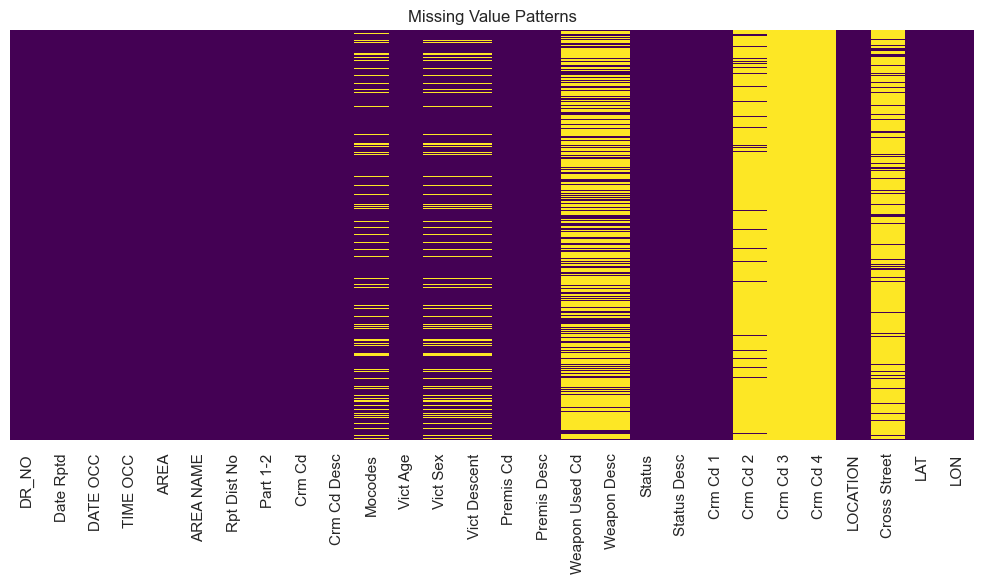

In [3]:
def analyze_missing_values(df):
    """
    Perform comprehensive missing value analysis.

    Parameters:
    df (pandas.DataFrame): Input DataFrame

    Returns:
    dict: Dictionary containing various missing value analyses
    """
    # Basic missing value statistics
    missing_info = pd.DataFrame({
        'missing_count': df.isnull().sum(),
        'missing_percentage': (df.isnull().sum() / len(df) * 100).round(2),
        'data_type': df.dtypes
    })

    # Missing value patterns by location
    missing_by_location = pd.DataFrame({
        col: df.groupby('LOCATION')[col].apply(lambda x: x.isnull().mean() * 100).round(2)
        for col in df.select_dtypes(include=['float64']).columns
    })

    # Analyze missing value relationships
    missing_correlations = df.isnull().corr()

    # Create visualization of missing values using seaborn
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
    plt.title('Missing Value Patterns')
    plt.tight_layout()

    return {
        'missing_summary': missing_info,
        'missing_by_location': missing_by_location,
        'missing_correlations': missing_correlations
    }

# Example usage
missing_analysis = analyze_missing_values(df)
print("\nMissing Value Summary:")
print(missing_analysis['missing_summary'])
print("\nMissing Values by Location (%):")
print(missing_analysis['missing_by_location'])

### From the missing data pattern above we see that  attributes Weapon Used Cd, Weapon Desc, Crime Cd2, 3,4 have have higher percentage of  missing data along with few others. Missing Weapon Cd/Desc is acceptable as not every crime involves a  weapon. Crimes like Vehicle theft, vandalism, shop lifting dont involve a weapon. We would still need this field but we cant use any imputation tecnhique to fill in the weapon information but instead will use a default 'No Weapon'. Since we have Crime cd 1 present for all records, the rest of the Crime codes fields can be ignored for the analyis

## 3. Correlation overview


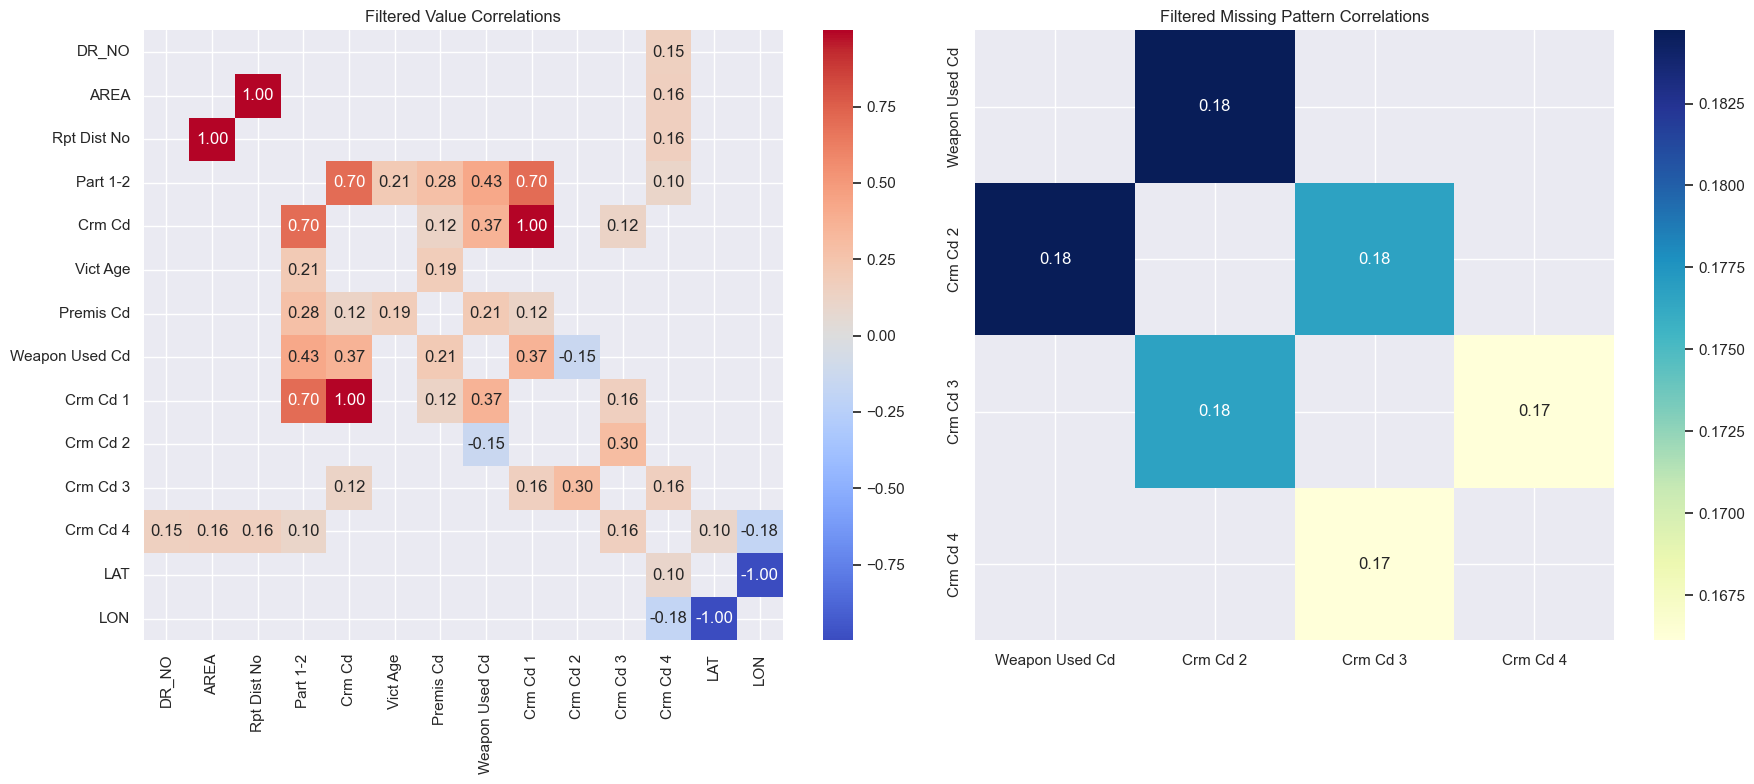


Value Correlations:
                   DR_NO  TIME OCC      AREA  Rpt Dist No  Part 1-2    Crm Cd  \
DR_NO           1.000000 -0.002408  0.033859     0.034148 -0.039535 -0.023019   
TIME OCC       -0.002408  1.000000  0.000892     0.001007 -0.057393  0.010437   
AREA            0.033859  0.000892  1.000000     0.999051  0.007739 -0.006097   
Rpt Dist No     0.034148  0.001007  0.999051     1.000000  0.007552 -0.006234   
Part 1-2       -0.039535 -0.057393  0.007739     0.007552  1.000000  0.698380   
Crm Cd         -0.023019  0.010437 -0.006097    -0.006234  0.698380  1.000000   
Vict Age       -0.067751 -0.035372  0.022713     0.022743  0.206264 -0.021016   
Premis Cd       0.025126 -0.063752 -0.006286    -0.006489  0.279679  0.118137   
Weapon Used Cd  0.018086 -0.006150 -0.016629    -0.016002  0.426182  0.365909   
Crm Cd 1       -0.022837  0.010441 -0.006304    -0.006441  0.698843  0.999329   
Crm Cd 2        0.028240  0.007530 -0.035583    -0.035985  0.075955  0.000172   
Crm Cd 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def analyze_correlations(df, method='pearson'):
    """
    Analyze correlations between numerical variables, handling missing values.
    """
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

    # Correlation of actual values
    correlation_matrix = df[numerical_cols].corr(method=method)
    missing_correlation = df[numerical_cols].isnull().corr()

    # Filtered matrices
    threshold = 0.1
    corr_filtered = correlation_matrix[(abs(correlation_matrix) > threshold) & (correlation_matrix != 1.0)].dropna(how='all').dropna(axis=1, how='all')

    missing_corr_filtered = missing_correlation[(abs(missing_correlation) > threshold) & (missing_correlation != 1.0)].dropna(how='all').dropna(axis=1, how='all')

    # Creating subplots 
    fig, axes = plt.subplots(1, 2, figsize=(18, 8))

    if not corr_filtered.empty:
        sns.heatmap(corr_filtered, cmap='coolwarm', annot=True, fmt='.2f', ax=axes[0])
        axes[0].set_title('Filtered Value Correlations')
    else:
        axes[0].set_visible(False)

    if not missing_corr_filtered.empty:
        sns.heatmap(missing_corr_filtered, cmap='YlGnBu', annot=True, fmt='.2f', ax=axes[1])
        axes[1].set_title('Filtered Missing Pattern Correlations')
    else:
        axes[1].set_visible(False)

    plt.tight_layout()
    plt.show()

    return {
        'value_correlations': correlation_matrix,
        'missing_correlations': missing_correlation
    }

# Example usage
correlations = analyze_correlations(df)
print("\nValue Correlations:")
print(correlations['value_correlations'])


#### There is a strong correlation between following attribute and hence one of the attribute can be removed
#### Crm Cd 2 and AREA (1.00) ->  redundant feature
#### Rpt Dist No and AREA (1.00) -> as both represent region this seems to be redundant
#### From the missing data correlation we can see that there is a weak correlation between weapon use and crime code 2, indicating that when crime is less severe weapon cd and  crime code 2,3 are  not recorded or likely not used. Crime cd 2,3,4 can be treated as supplementary data."-

### 4. Feature Engineering

In [5]:
#Dropping due high cardinality for one hot encoding. will be using LAT/LONG, zipcode instead
df.drop(['LOCATION'], axis=1, inplace=True)

In [6]:
#dropping redundant code fields as we have descripton fields
df.drop(['Crm Cd','Mocodes','AREA','Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4','Rpt Dist No','Cross Street','Weapon Used Cd', 'Status','Premis Cd'], axis=1, inplace=True)

In [8]:

df['Weapon Desc'] = df['Weapon Desc'].fillna('No Weapon')


In [9]:
#Adding default for missing data
df['Premis Desc'] = df['Premis Desc'].fillna('Unknown')
df['Status Desc'] = df['Status Desc'].fillna('Unknown')
df['Vict Sex'] = df['Vict Sex'].fillna('Unknown')
df['Vict Descent'] = df['Vict Descent'].fillna('Unknown') 

    

In [10]:
# Checking TIME OCC is a 4-digit string 
df['TIME OCC'] = df['TIME OCC'].astype(str).str.zfill(4)
# Extract hour
df['hour'] = df['TIME OCC'].str[:2].astype(int)

# Defining time bins
def get_time_bin(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

# Apply binning
df['time_bin'] = df['hour'].apply(get_time_bin)


In [11]:
# Converting to datetime
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], format='%m/%d/%Y', errors='coerce')

# Extract features
df['day_of_week'] = df['DATE OCC'].dt.day_name()
df['month'] = df['DATE OCC'].dt.month_name()
df['weekend'] = df['DATE OCC'].dt.dayofweek >= 5  


In [12]:
# Defining age bins and corresponding labels
age_bins = [0, 12, 18, 35, 60, 120]  # 0-12=Child, 13-18=Teen, 19-35=Young Adult, etc.
age_labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']

# Creating age group column
df['Victim_Age_Group'] = pd.cut(df['Vict Age'], bins=age_bins, labels=age_labels, right=False)


In [13]:
#Creating Zip code feature by using LAT , LONG fields using US LA County zip code shapely
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

# Loading ZIP codes src files
zip_gdf = gpd.read_file("LA_County_ZIP_Codes.shp").to_crs(epsg=4326)

#  Creating GeoDataFrame
df['geometry'] = df.apply(lambda r: Point(r['LON'], r['LAT']), axis=1)
gdf = gpd.GeoDataFrame(df, geometry='geometry', crs="EPSG:4326")


#Performing the spatial join using the correct ZIP code column
gdf_zip = gpd.sjoin(gdf, zip_gdf[['ZIPCODE', 'geometry']], how="left", predicate="within")

# Assigning the ZIP code to original dataframe
gdf_zip['Zip_Code'] = gdf_zip['ZIPCODE']
df = df.merge(gdf_zip[['DR_NO', 'Zip_Code']], on='DR_NO', how='left')

#removing the redundant field after we completed the spatial join
df.drop(columns='geometry', inplace=True)




In [14]:
df.drop(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC'], axis=1, inplace=True)


In [15]:
df['Zip_Code'] = df['Zip_Code'].fillna('99999')



In [16]:
zip_counts = df['Zip_Code'].value_counts()

In [17]:
# To reduce computational overhead grouping infrequent zip codes into one bucket
zip_counts = df['Zip_Code'].value_counts()
rare_zips = zip_counts[zip_counts < 100].index  
df['Zip_Code'] = df['Zip_Code'].replace(rare_zips, 'Other')


In [18]:
df.head()

,AREA NAME,Part 1-2,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status Desc,Crm Cd 1,LAT,LON,hour,time_bin,day_of_week,month,weekend,Victim_Age_Group,Zip_Code
0,Wilshire,1,VEHICLE - STOLEN,0,M,O,STREET,No Weapon,Adult Arrest,510.0,34.0375,-118.3506,21,Evening,NaN,NaN,False,Child,90016
1,Central,1,BURGLARY FROM VEHICLE,47,M,O,BUS STOP/LAYOVER (ALSO QUERY 124),No Weapon,Invest Cont,330.0,34.0444,-118.2628,18,Evening,NaN,NaN,False,Adult,90015
2,Southwest,1,BIKE - STOLEN,19,X,X,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",No Weapon,Invest Cont,480.0,34.0210,-118.3002,17,Afternoon,NaN,NaN,False,Young Adult,90007
3,Van Nuys,1,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,O,CLOTHING STORE,No Weapon,Invest Cont,343.0,34.1576,-118.4387,20,Evening,NaN,NaN,False,Young Adult,91423
4,Hollenbeck,1,VEHICLE - STOLEN,0,Unknown,Unknown,STREET,No Weapon,Invest Cont,510.0,34.0820,-118.2130,6,Morning,NaN,NaN,False,Child,90031


In [19]:
fields = df.columns.tolist()
print(fields)


['AREA NAME', 'Part 1-2', 'Crm Cd Desc', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Desc', 'Weapon Desc', 'Status Desc', 'Crm Cd 1', 'LAT', 'LON', 'hour', 'time_bin', 'day_of_week', 'month', 'weekend', 'Victim_Age_Group', 'Zip_Code']


### 5. One Hot Encoding the categorical columns

In [20]:
from sklearn.preprocessing import OneHotEncoder
df_encoded = df.copy()
# List of specific columns to one-hot encode

columns_to_encode = [ 'AREA NAME', 'Part 1-2','Vict Sex', 'time_bin', 'day_of_week','Victim_Age_Group']

#columns_to_encode = ['Prem 'Weapon Desc', 'Status Desc', 'AREA NAME', 'Crm Cd Desc','Part 1-2,'Vict Sex', 'Vict Descent','time_bin', 'day_of_week', 'month','Victim_Age_Group']

# Apply one-hot encoding and update df in place
df = pd.get_dummies(df, columns=columns_to_encode, dummy_na=False)



In [21]:
fields = df.columns.tolist()
print(fields)

['Crm Cd Desc', 'Vict Age', 'Vict Descent', 'Premis Desc', 'Weapon Desc', 'Status Desc', 'Crm Cd 1', 'LAT', 'LON', 'hour', 'month', 'weekend', 'Zip_Code', 'AREA NAME_77th Street', 'AREA NAME_Central', 'AREA NAME_Devonshire', 'AREA NAME_Foothill', 'AREA NAME_Harbor', 'AREA NAME_Hollenbeck', 'AREA NAME_Hollywood', 'AREA NAME_Mission', 'AREA NAME_N Hollywood', 'AREA NAME_Newton', 'AREA NAME_Northeast', 'AREA NAME_Olympic', 'AREA NAME_Pacific', 'AREA NAME_Rampart', 'AREA NAME_Southeast', 'AREA NAME_Southwest', 'AREA NAME_Topanga', 'AREA NAME_Van Nuys', 'AREA NAME_West LA', 'AREA NAME_West Valley', 'AREA NAME_Wilshire', 'Part 1-2_1', 'Part 1-2_2', 'Vict Sex_-', 'Vict Sex_F', 'Vict Sex_H', 'Vict Sex_M', 'Vict Sex_Unknown', 'Vict Sex_X', 'time_bin_Afternoon', 'time_bin_Evening', 'time_bin_Morning', 'time_bin_Night', 'Victim_Age_Group_Child', 'Victim_Age_Group_Teen', 'Victim_Age_Group_Young Adult', 'Victim_Age_Group_Adult', 'Victim_Age_Group_Senior']


In [22]:
df.head()

,Crm Cd Desc,Vict Age,Vict Descent,Premis Desc,Weapon Desc,Status Desc,Crm Cd 1,LAT,LON,hour,...,Vict Sex_X,time_bin_Afternoon,time_bin_Evening,time_bin_Morning,time_bin_Night,Victim_Age_Group_Child,Victim_Age_Group_Teen,Victim_Age_Group_Young Adult,Victim_Age_Group_Adult,Victim_Age_Group_Senior
0,VEHICLE - STOLEN,0,O,STREET,No Weapon,Adult Arrest,510.0,34.0375,-118.3506,21,...,False,False,True,False,False,True,False,False,False,False
1,BURGLARY FROM VEHICLE,47,O,BUS STOP/LAYOVER (ALSO QUERY 124),No Weapon,Invest Cont,330.0,34.0444,-118.2628,18,...,False,False,True,False,False,False,False,False,True,False
2,BIKE - STOLEN,19,X,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",No Weapon,Invest Cont,480.0,34.0210,-118.3002,17,...,True,True,False,False,False,False,False,True,False,False
3,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,O,CLOTHING STORE,No Weapon,Invest Cont,343.0,34.1576,-118.4387,20,...,False,False,True,False,False,False,False,True,False,False
4,VEHICLE - STOLEN,0,Unknown,STREET,No Weapon,Invest Cont,510.0,34.0820,-118.2130,6,...,False,False,False,True,False,True,False,False,False,False


### 6. Clustering